In [156]:
import pandas as pd
import numpy as np
import seaborn as sns

In [157]:
import matplotlib.pyplot as plt

In [158]:
plt.rc('axes', unicode_minus=False)
plt.rc('font', family='Malgun Gothic') #-> 한글글자 설정(이것이 빠지면 나중에 시각화할때 한글이 안보임)
#한글폰트 깨지는 경우 방지하기 위해 unicode_minus를 False로 설정

In [159]:
from IPython.display import set_matplotlib_formats 
set_matplotlib_formats('retina') #글씨 선명하게 보이게 하기위해

In [160]:
df = pd.read_csv("./소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)
#그냥 데이터를 로드하면 타입이 섞여있어서 low_memory를 False로 지정해달라고 오류가 뜬다 이를 해결하기위해 설정
#df라는 변수에 로드해온 데이터를 담았다

In [161]:
df.shape
#(헹, 열)데이터수를 알수있다
# 91335개의 행과 39개의 열개수를 가진 것을 알 수 있다

(91335, 39)

In [162]:
df.head()
#앞에서부터 5개의 데이터를 미리보기로 볼 수 있다

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [163]:
df.tail()
#뒤에서부터 5개 데이터 볼 수 있다

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91330,16196725,온누리약국,베스트,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,3017011200115070000021096,NaN,대전광역시 서구 문예로 67,302831.0,35240.0,NaN,NaN,NaN,127.389865,36.352728
91331,16192180,리원,봄산후조,S,의료,S07,의료관련서비스업,S07A07,산후조리원,S96993,...,4128112300111460000011715,청한프라자,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,NaN,NaN,NaN,126.830144,37.627530
91332,16127538,참좋은요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2641010800105380001005572,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,NaN,2,NaN,129.082790,35.227138
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1174010500103450009002392,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.806640


In [164]:
df.info()
#이 데이터프레임의 정보를 볼 수 있다
#메모리 얼마나 사용하고 있는지, 데이터 타입(int64는 정수형, object는 문자열, float은 실수형), 결측치 수를 알 수 있다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [165]:
df.columns
#컬럼명 볼 수 있다

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [166]:
df.dtypes
#데이터 타입 볼 수 있다

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

In [167]:
#### 여기까지 3-2

In [168]:
#3-3결측치 다루기 

In [169]:
#결측치에 대해서 설명 -> 결측치란 : 쉽게 얘기해서 값이 없는 것 
df.isnull()
#이 명령으로 true, false값을 얻을 수 있는데 true로 표시되는 값들은 없는값인 즉 결측치이다
# 파이썬에서 true는 1과 같다/ false로 표시되면은 값이 들어있다는 것을 의미

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
3,False,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False
91331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
91332,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
91333,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False


In [170]:
#isnull에 sum을 해본다 -> true==1이므로 결측치가 몇개있는지 세어줌
#건물명, 동정보, 층정보에 결측치가 상당히 많아보이는 결과를 보여줌
#null_count라는 변수에 담아서 사용해보겠다
null_count = df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

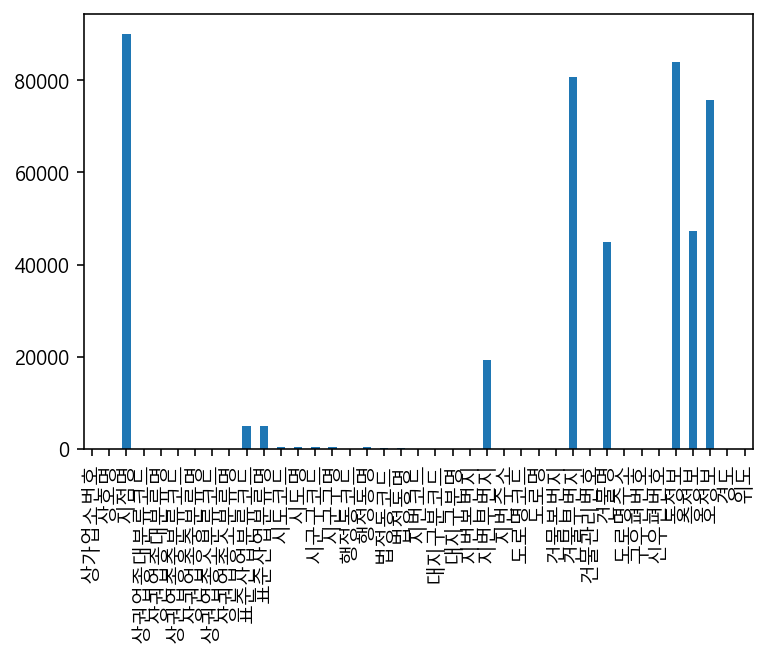

In [171]:
#위에서 구한 결측치를 .plot.bar를 통해 막대그래프로 표현한다
null_count.plot.bar()

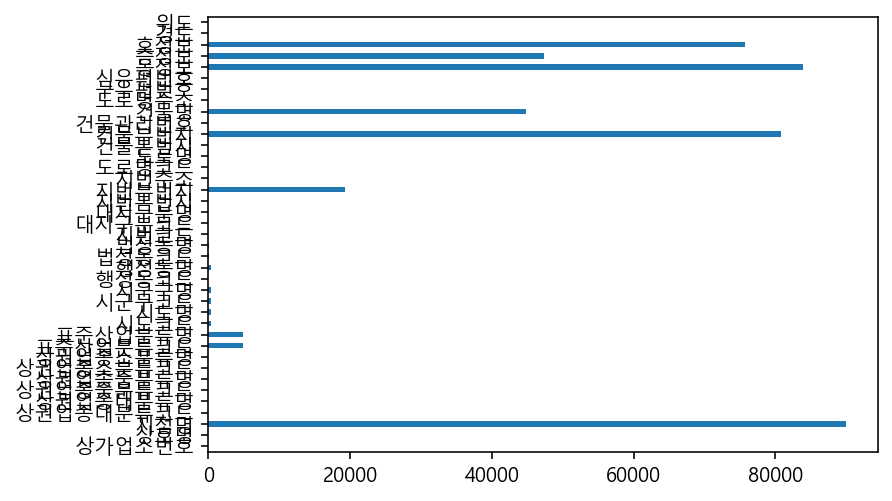

In [172]:
null_count.plot.barh()
#barh() -> 세로 막대형 그래프

In [173]:
df_null_count = null_count.reset_index()
#reset_index()하면은 데이터 프레임 형태로 변환된다
#이를 df_null_count라고 지정한 변수에 담아서 출력해보았다

In [174]:
df_null_count

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0
5,상권업종중분류코드,0
6,상권업종중분류명,0
7,상권업종소분류코드,0
8,상권업종소분류명,0
9,표준산업분류코드,4922


In [175]:
#위에 index 0 이렇게 되어있는 컬럼명을 다음과 같이 변경해주었다(컬럼명 변경)
df_null_count.columns=["컬럼명", "결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [176]:
#결측치가 있는 컬럼만 보고 싶다 
#속성으로 결측치가 많은 순으로 출력 
df_null_count.sort_values(by="결측치수", ascending=False)

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [177]:
df["지점명"]
#지점명 컬럼을 불러온다
#출력되는 NaN은 Not a Number의 약자로 결측치를 의미한다

0         NaN
1         NaN
2         NaN
3         NaN
4         수지점
         ... 
91330     베스트
91331    봄산후조
91332     NaN
91333     NaN
91334     NaN
Name: 지점명, Length: 91335, dtype: object

In [178]:
###3-3끝

In [179]:
###3-4 수치 데이터 요약 - 기술 통계 값 보기 

In [180]:
#데이터 타입들 확인 can
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

In [181]:
#위도컬럼의 평균값 출력 ->mean()으로
df["위도"].mean()

36.62471119236673

In [182]:
#위도의 중앙값 -> median으로
df["위도"].median()

37.23465231770329

In [183]:
# 최댓값 -> max
df["위도"].max()

38.499658570559795

In [184]:
#최솟값 -> min
df["위도"].min()

33.2192896688307

In [185]:
#갯수 -> count()
df["위도"].count()

91335

In [186]:
#describe() -> 값들을 요약해준다
df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [187]:
###3-4 끝

### 

In [188]:
#3-5 문자열 데이터 요약하기 - pandas로 시각화


In [189]:
df["상권업종중분류명"]
#이를 보면 중복된 값들도 다나옴

0              병원
1              병원
2              병원
3              병원
4          약국/한약방
           ...   
91330      약국/한약방
91331    의료관련서비스업
91332          병원
91333          병원
91334          병원
Name: 상권업종중분류명, Length: 91335, dtype: object

In [190]:
df["상권업종중분류명"].unique()
#unique로 중복된 값 제거하고 보여준다

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [191]:
#value_counts()로 그룹화하여 개수 세어주는 것을 출력할 수 있다
df["시도명"].value_counts()

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [192]:
#value_counts()에 normalize=True 옵션을 사용해주면 각각의 데이터가 얼마만큼을 차지하는지 비율을 알 수 있다
df["시도명"].value_counts(normalize=True)

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

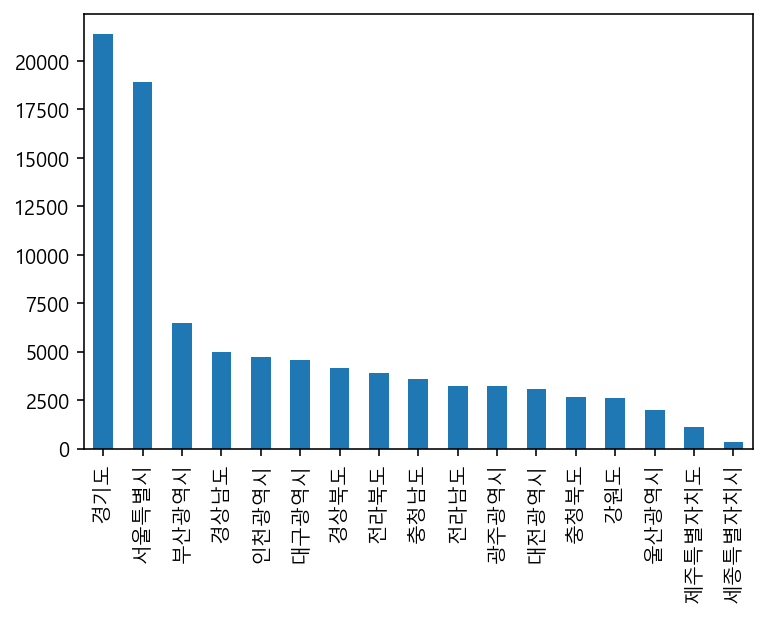

In [193]:
df["시도명"].value_counts().plot.bar()
#위의 결과를 시각화로 보여줌-> 막대그래프

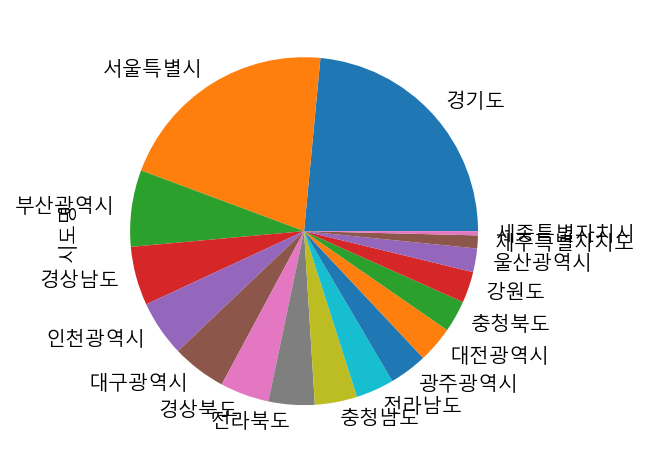

In [194]:
df["시도명"].value_counts().plot.pie()
# 시각화 => 파이그래프로 보여줌

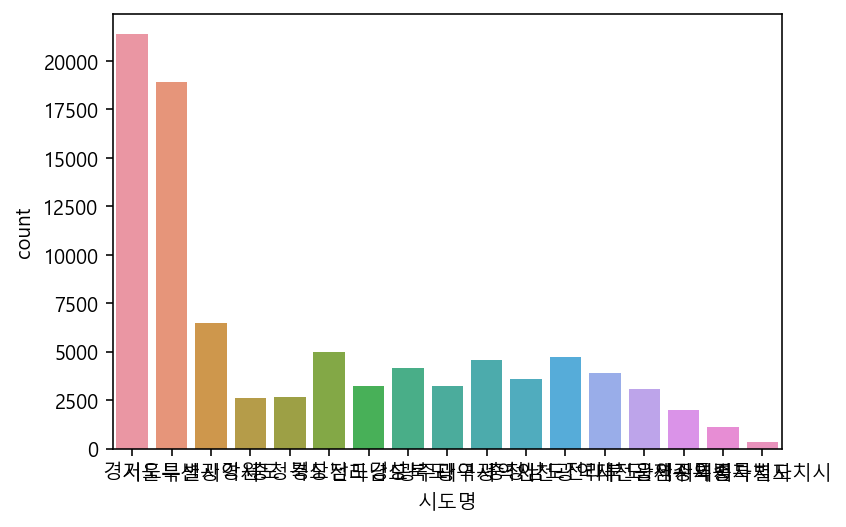

In [195]:
#seaborn의 countplot으로 시각화 -> 장점은 고급 통계기능을 제공하지만 단점은 데이터가 많을수록 느리다는 것
# seaborn의 또다른 장점은 예쁘게 그린다
sns.countplot(data=df, x="시도명")

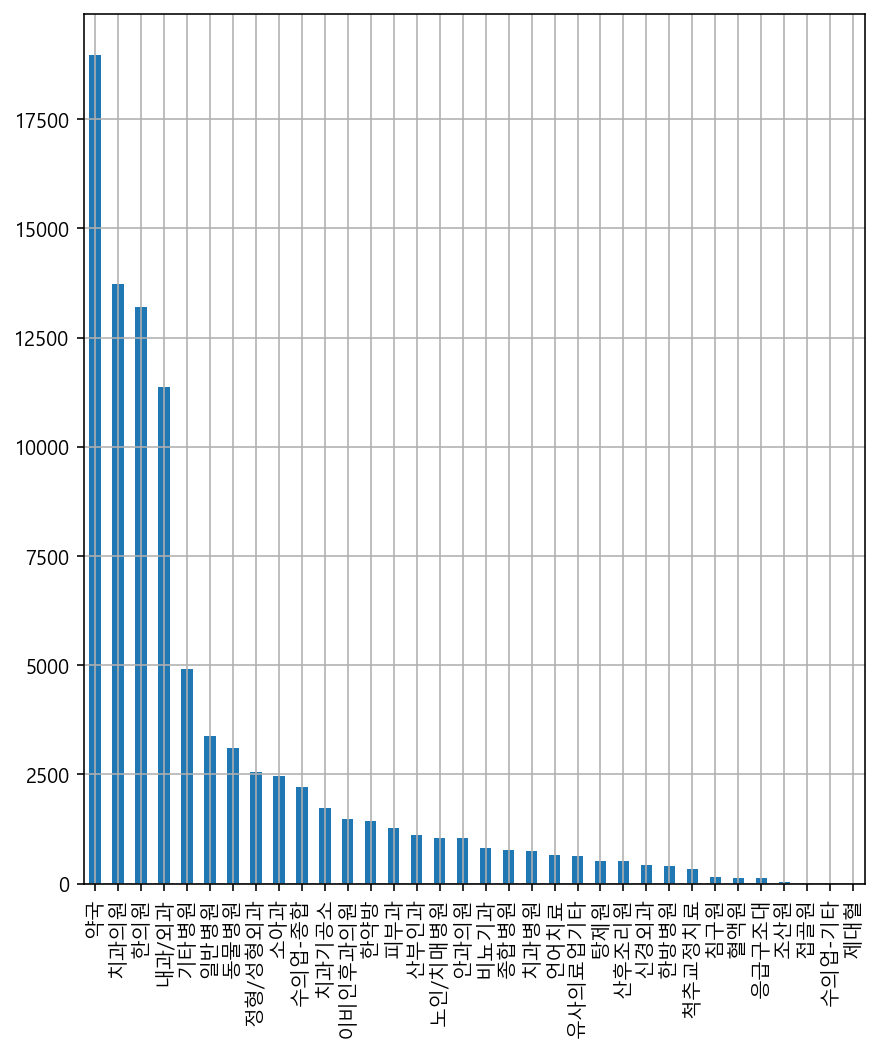

In [196]:
c = df["상권업종소분류명"].value_counts()
c.plot.bar(figsize=(7,8),grid=True)
# 사이즈를 조절하고 그리드를 넣어보았다

In [197]:
##3-6 끝

In [198]:
#3-7 원하는 데이터만 따로 추출해오기 -데이터 색인하기
#특정 데이터만 모아서 따로 보기

In [201]:
#"상권업종중분류명"이 "약국/한약방"인 데이터만 가져와서
#df_medical이라는 변수에 담고

df_medical = df[df["상권업종중분류명"] == "약국/한약방"].copy()

In [202]:
#head()를 통해 미리보기 해보기
df_medical.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528
6,20733252,춘산한약방,NaN,S,의료,S02,약국/한약방,S02A02,한약방,G47811,...,4211010500101000000023668,NaN,강원도 춘천시 낙원길 50,200042.0,24273.0,NaN,2,NaN,127.726905,37.880504
7,20582210,부부탕제원,NaN,S,의료,S02,약국/한약방,S02A03,탕제원,G47859,...,4311112000101870017042942,NaN,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,NaN,1,NaN,127.499206,36.625355
10,21057519,민생약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4889046030200780002048274,NaN,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,NaN,NaN,NaN,128.118615,35.575962
13,21217689,제중당한약방,NaN,S,의료,S02,약국/한약방,S02A02,한약방,G47811,...,4683035023102960000000001,NaN,전라남도 영암군 도포면 인덕길 75-10,526832.0,58429.0,NaN,NaN,NaN,126.630348,34.834080


In [205]:
#"상권업종대분류명"에서 "의료"만 가져온다
#df.loc을 사용하면 행, 열을 함께 가져올 수 있다
df.loc[df["상권업종대분류명"] == "의료"]

#"상권업종대분류명"에서 "의료"의 개수를 shape로 구헤볼 수 있다
df[df["상권업종대분류명"] == "의료"].shape

(91335, 39)

In [208]:
#"상권업종소분류명"이 "약국"인 것과 "시도명"이 "서울특별시"인 데이터만 가져온다
df[(df["상권업종소분류명"] == "약국") & (df["시도명"] == "서울특별시") ]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
33,20816709,이즈타워약,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1168010100108210001000001,이즈타워,서울특별시 강남구 테헤란로 101,135080.0,6134.0,NaN,1,NaN,127.028023,37.498656
51,20855710,진흥약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1174010600106090000000001,둔촌푸르지오아파트,서울특별시 강동구 명일로 172,134767.0,5360.0,NaN,NaN,NaN,127.145055,37.534135
130,21589838,신세계약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1126010600106460000000300,금강리빙스텔,서울특별시 중랑구 신내로 211,131130.0,2024.0,NaN,1,NaN,127.092597,37.616424
136,22388303,메디팜한솔약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1120010700103460012016935,한진노변상가,서울특별시 성동구 행당로 82,133777.0,4717.0,NaN,1,NaN,127.027513,37.556238
141,22412563,명약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1123010900102860121007257,NaN,서울특별시 동대문구 망우로18나길 3,130090.0,2498.0,NaN,1,NaN,127.060556,37.587349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91239,16131547,우리이웃약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1129013500100340003022753,종암선경아파트,서울특별시 성북구 종암로5길 26,136769.0,2811.0,NaN,1,116,127.033908,37.594792
91275,16195709,더블유스토어,세계로,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1153010200105010000000001,신구로자이나인스에비뉴,서울특별시 구로구 구로중앙로 134,152731.0,8293.0,1,1,NaN,126.884285,37.499936
91288,16131839,종각팜약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1111013800100160006014311,대한기독교서회,서울특별시 종로구 종로 68,110122.0,3189.0,NaN,1,NaN,126.984930,37.569882
91301,16188650,온누리약국,우리네,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,1153010200107980032000001,NaN,서울특별시 구로구 디지털로27길 116,152875.0,8374.0,NaN,NaN,NaN,126.888070,37.484897


In [209]:
#서울에 있는 약국의 수를 알아보고 싶다
df[(df["상권업종소분류명"] == "약국") & (df["시도명"] == "서울특별시")].shape

(3579, 39)

In [ ]:
##3-7 완료

In [ ]:
##3-8 시작
#원하는 텍스트 데이터를 추출하고 처리하는 방법

In [ ]:
#위의 서울에 있는 약국의 수를 자유자재로 사용하기 위해 
#df_seoul_drug라는 변수에 담는다


In [210]:
df_seoul_drug = df[(df["상권업종소분류명"] == "약국") & (df["시도명"] == "서울특별시")]

In [213]:
#구별로 약국이 몇개가 있는지 확인
#아래에서 이를 시각화해보는데 편히 사용하기 위해 c라는 변수에 담았다
c = df_seoul_drug["시군구명"].value_counts()
c

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
노원구     169
성북구     160
은평구     151
영등포구    145
강서구     136
마포구     136
중랑구     129
서대문구    120
관악구     118
강동구     117
종로구     111
양천구     109
중구      106
강북구     104
구로구     102
동작구      96
성동구      88
용산구      87
금천구      85
도봉구      84
Name: 시군구명, dtype: int64

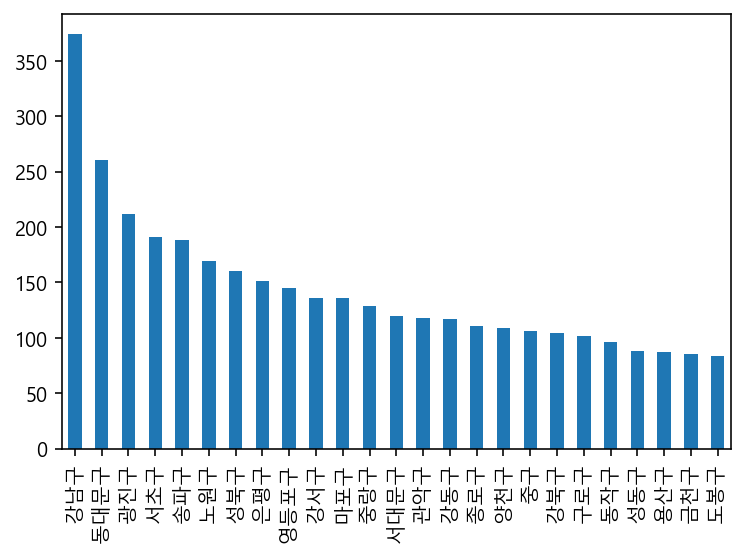

In [214]:
#그래프로 확인
c.plot.bar()

In [216]:
#텍스트 데이터 색인하기
#"상권업종소분류명"이 "종합병원"인 것과 "시도명"이 "서울특별시"인 데이터
#즉, 서울특별시의 종합병원을 가져와서 df_seoul_hospital이라는 변수에 담았다
df_seoul_hospital = df[(df["상권업종소분류명"] == "종합병원") &
                      (df["시도명"] == "서울특별시")].copy()
#copy안하고 할당하면 안의 값들이 바뀔수 있어서 주의해야한다
df_seoul_hospital


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
305,25155642,대진의료재단,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1121510100100580025000733,재단법인대순진리회,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,NaN,NaN,NaN,127.088279,37.559048
353,20471487,홍익병원별관,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1147010100108970013001044,홍익병원별관,서울특별시 양천구 국회대로 250,158070.0,7937.0,NaN,1,NaN,126.862805,37.529213
385,20737057,SNUH,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1168010100107360055027688,성보빌딩,서울특별시 강남구 테헤란로26길 10,135080.0,6236.0,NaN,4,NaN,127.035825,37.499630
1917,23210677,평화드림여의도성모병원의료기매장,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1156011000100620000031477,여의도성모병원,서울특별시 영등포구 63로 10,150713.0,7345.0,NaN,1,NaN,126.936693,37.518296
2461,20024045,한양,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1120010700100150001019623,한대동문회관,서울특별시 성동구 마조로 22-2,133070.0,4763.0,NaN,4,NaN,127.041325,37.559469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71991,28505952,서울성모병원응급의료센터,응급의료센터,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1165010700101230000017226,가톨릭대학교성의교정,서울특별시 서초구 반포대로 222,137701.0,6591.0,NaN,1,NaN,127.005841,37.502382
76508,12292992,라마르의원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1174010900104530021010314,원방빌딩,서울특별시 강동구 천호대로157길 18,134864.0,5335.0,NaN,NaN,NaN,127.127466,37.538485
90492,16031909,가톨릭대학교여의도성모병원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1114012700100010001019574,명동성당,서울특별시 중구 명동길 74,100809.0,4537.0,NaN,NaN,NaN,126.986758,37.563662
90581,16332576,씨엠병원,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1156010500100900000035097,충무병원,서울특별시 영등포구 영등포로36길 13,150030.0,7301.0,NaN,NaN,NaN,126.903857,37.518807


In [218]:
#특정 단어가 들어가는 데이터만 가져온다 - 의료기
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("의료기")]
#감싸주어야 결과를 프레임형태로 볼 수 있다
#df_seoul_hospital["상호명"].str.contains("의료기")로만 확인하면 true, false만 알려준다

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
1917,23210677,평화드림여의도성모병원의료기매장,NaN,S,의료,S01,병원,S01B01,종합병원,Q86101,...,1156011000100620000031477,여의도성모병원,서울특별시 영등포구 63로 10,150713.0,7345.0,NaN,1,NaN,126.936693,37.518296


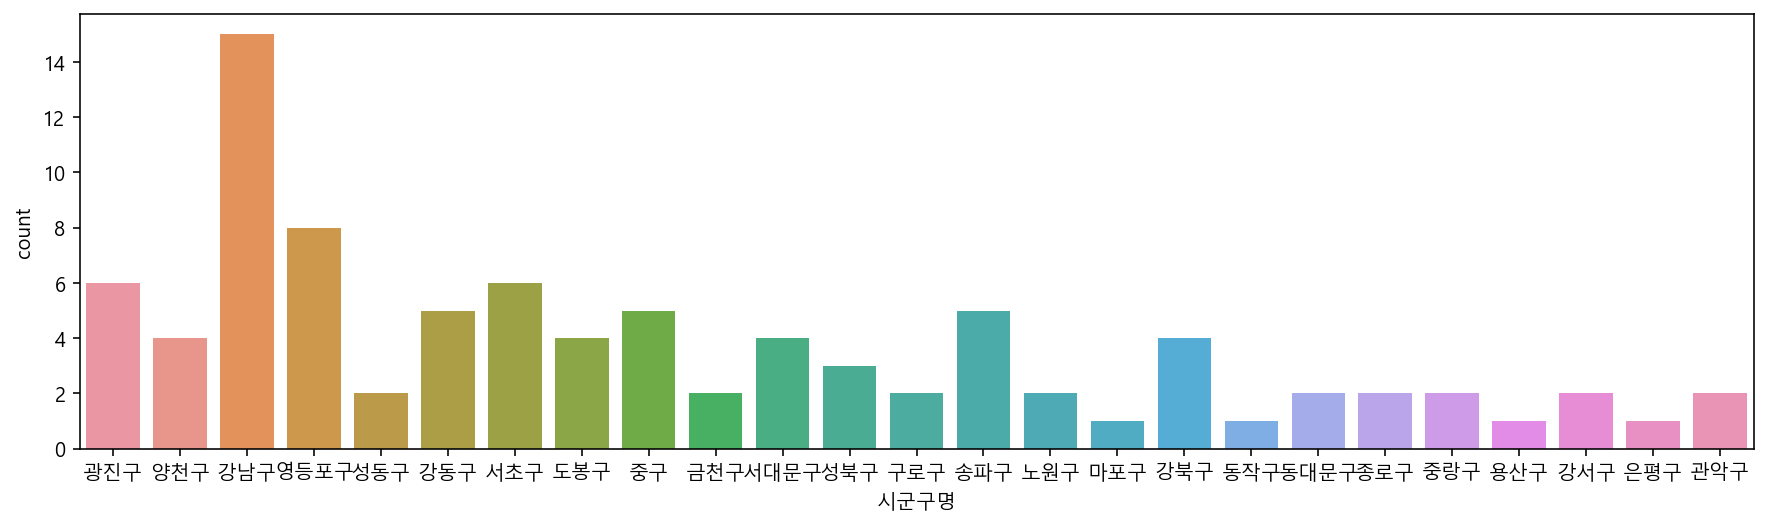

In [220]:
#seaborn으로 위에구한것을 출력해보았다
#글자크기도 적절하게 설정해주었다
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul_hospital, x="시군구명")

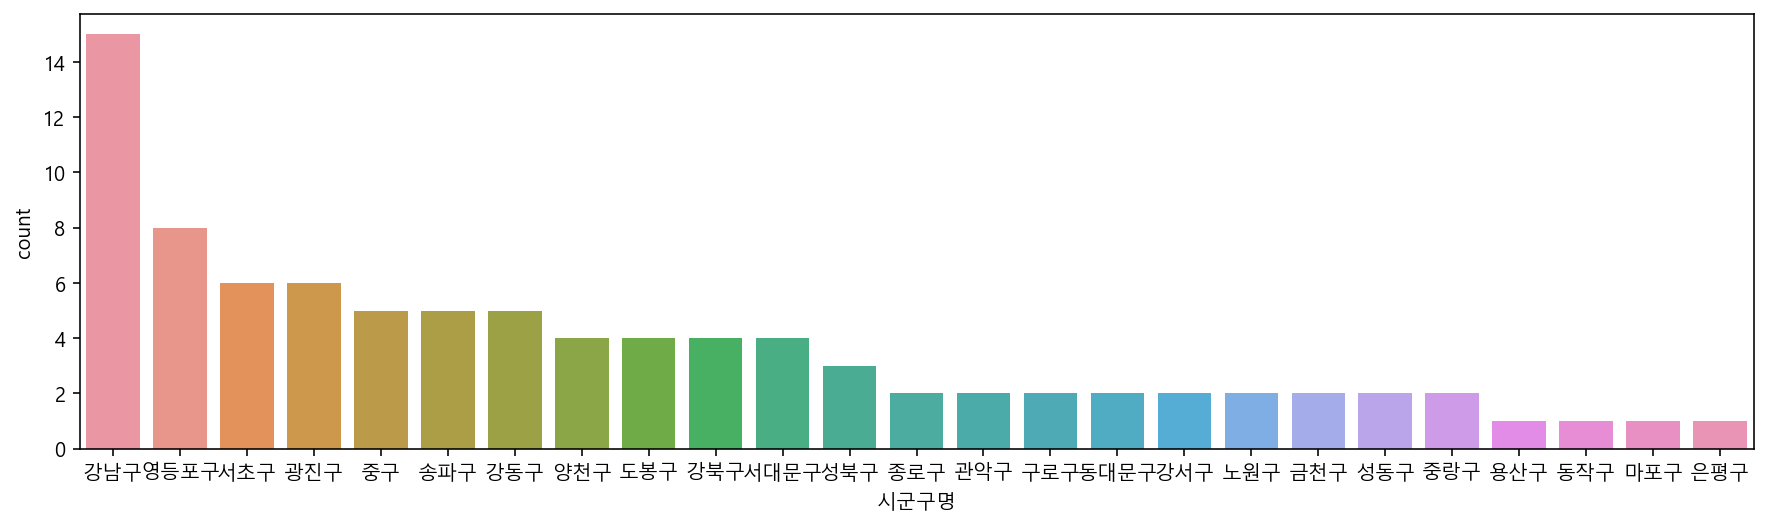

In [221]:
#위에 출력한 것을 개수가 많은 순으로 출력하고 싶다면 order옵션 사용 order=df_seoul_hospital["시군구명"].value_counts().index
#세주고 .index로 인덱스만 가져온다
#강남구에 종합병원이 가장 많은 것을 알수 있다(종합병원이 많은 순으로 구를 알 수 있다)
plt.figure(figsize=(15,4))
sns.countplot(data=df_seoul_hospital, x="시군구명", order=df_seoul_hospital["시군구명"].value_counts().index)

In [ ]:
#3-8 완료

In [ ]:
#3-9 시작 -> 특정 지역만 보기

In [224]:
# 서울에 있는 데이터의 위도와 경도를 봐 볼 것이다
# 이를 df_seoul이라는 변수에 담아서 몇행 몇열을 가지고 있는지 shape로 확인해보았다
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(18943, 39)

In [225]:
#위의 df_seoul의 데이터프레임의 시군구명으로 각 구별로 데이터가 얼마나 많은지 봐볼 수 있다
df_seoul["시군구명"].value_counts()

강남구     3120
서초구     1491
동대문구    1152
송파구     1021
광진구      935
강서구      799
노원구      741
은평구      739
영등포구     731
성북구      708
강동구      703
마포구      649
관악구      578
중구       576
양천구      574
서대문구     543
중랑구      497
종로구      492
동작구      489
성동구      482
구로구      451
도봉구      412
강북구      396
용산구      361
금천구      303
Name: 시군구명, dtype: int64

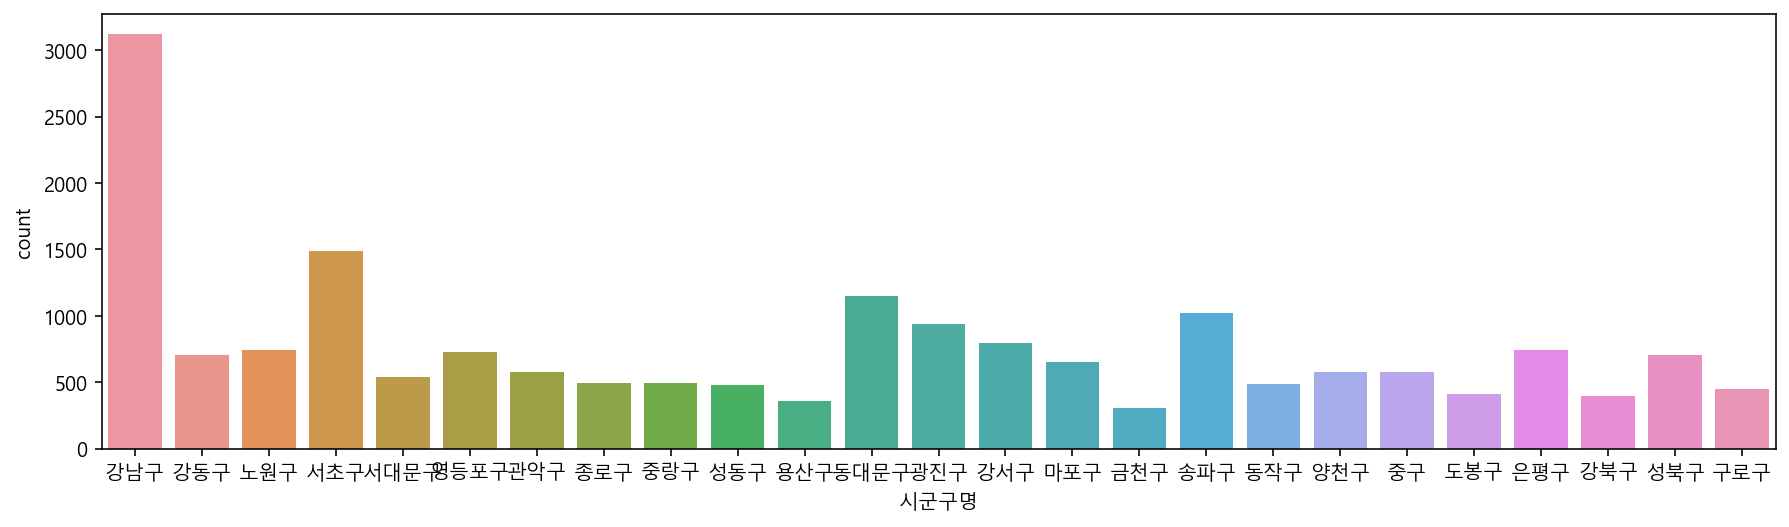

In [229]:
#위의 데이터를 seabornd의 countplot으로 시각화해본다
#카테코리컬한 데이터를 표현할때 countplot으로 개수를 세서 표현을 한다
plt.figure(figsize=(15,4)) #=> 15정도로 정해주면 글씨들이 겹치지 않는다
sns.countplot(data=df_seoul, x="시군구명")

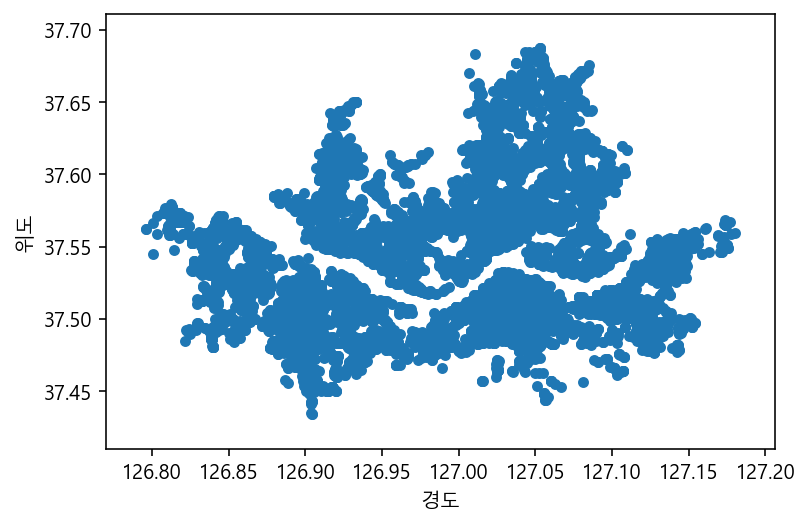

In [230]:
#pandas의 plot.scatter를 통해 경도와 위도를 표시한다
# "경도", "위도", "시군구명"으로 필요한 데이터들을 가져오고, x축에 경도, y축에 위도 설정
df_seoul[["경도", "위도", "시군구명"]].plot.scatter(x="경도", y="위도")

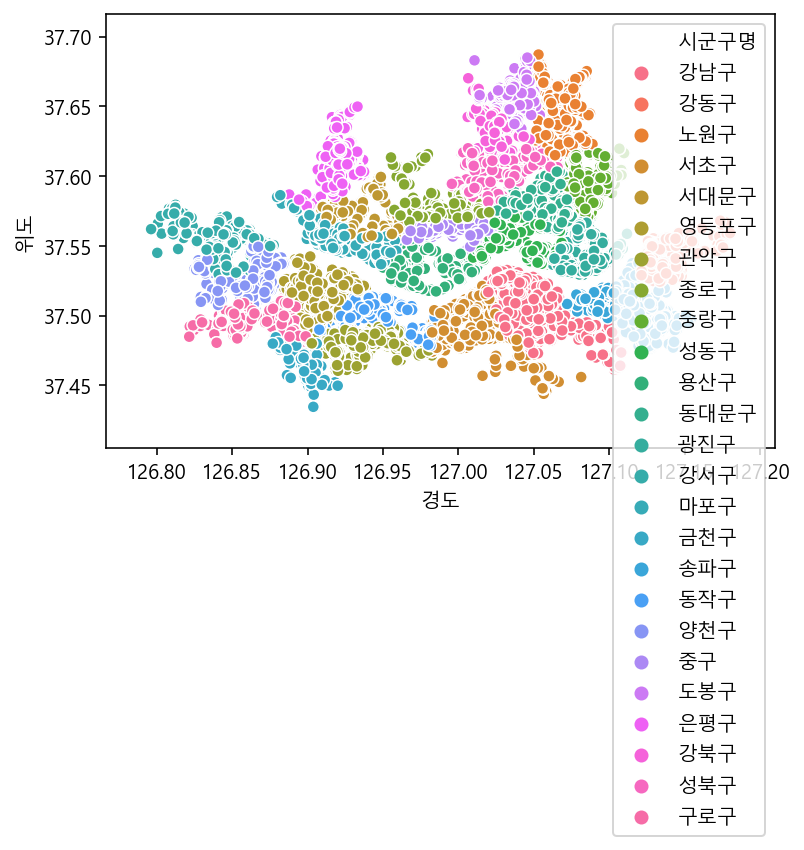

In [231]:
#seaborn으로 scatterplot을 그려본다
#hue옵션으로 시군구명으로 색상을 다르게 표현해볼수도 있다
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="시군구명")

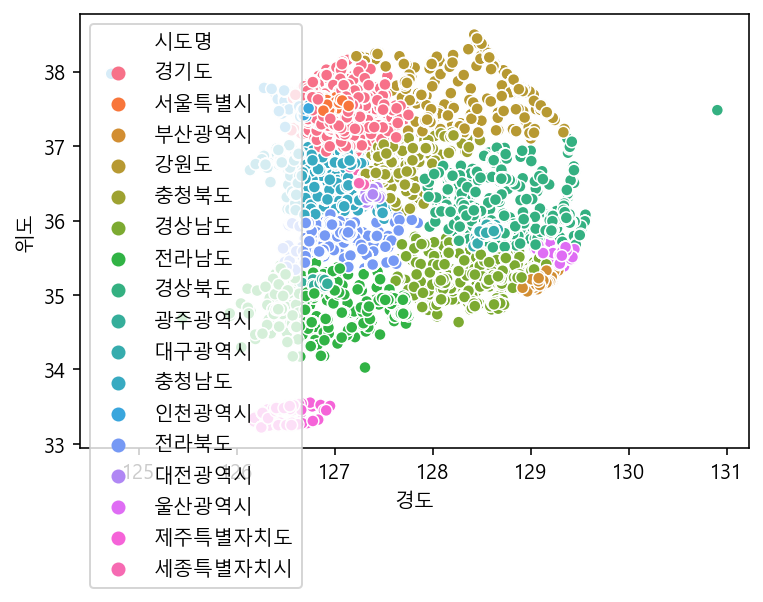

In [232]:
#seaborn의 scatterplot을 통해 전국데이터(df)로 구별 경도와 위도를 표시해본다
sns.scatterplot(data=df, x="경도", y="위도", hue="시도명")


In [233]:
#3-9 끝

In [235]:
#3-10 folium은 생략했다

In [236]:
########4강 시작 (초기 설정)

In [237]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [238]:
#이 명령을 써주어야 쥬피터 노트북 상에서 그래프가 표시된다
%matplotlib inline

In [240]:
#한글폰트 설정
import os
if os.name == 'posix':
    plt.rc("font",family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

In [241]:
#폰트깨지는 현상 방지코드
plt.rc("axes", unicode_minus=False)

In [243]:
#글씨 흐릿 방지 코드 
%config InlineBackend.figure_format='retina'

In [ ]:
#4-1 끝 

In [ ]:
#4-2 시작 건강검진정보 2017년 데이터를 이용하여 데이터 분석을 진행할 것이다


In [244]:
#건강검진정보(2017) 데이터 불러오기
df = pd.read_csv("./건강검진정보(2017).csv", encoding="cp949")

In [245]:
# 불러온 데이터의 행, 열 수 확인
df.shape

(1000000, 34)

In [246]:
#데이터 5개 미리보기
#이런 저런 데이터들이 있는 것을 알 수 있다
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,N,Y,NaN,NaN,NaN,NaN,NaN,2018-11-26
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [248]:
#4-2 끝

In [ ]:
#4-3 시작 로드한 데이터의 결측치를 보고 요약, 집계하기 -info, isnull, value_counts 

In [249]:
# 결측치 파악 해보기 -> 결측치는 true로 출력됨
df.isnull()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False


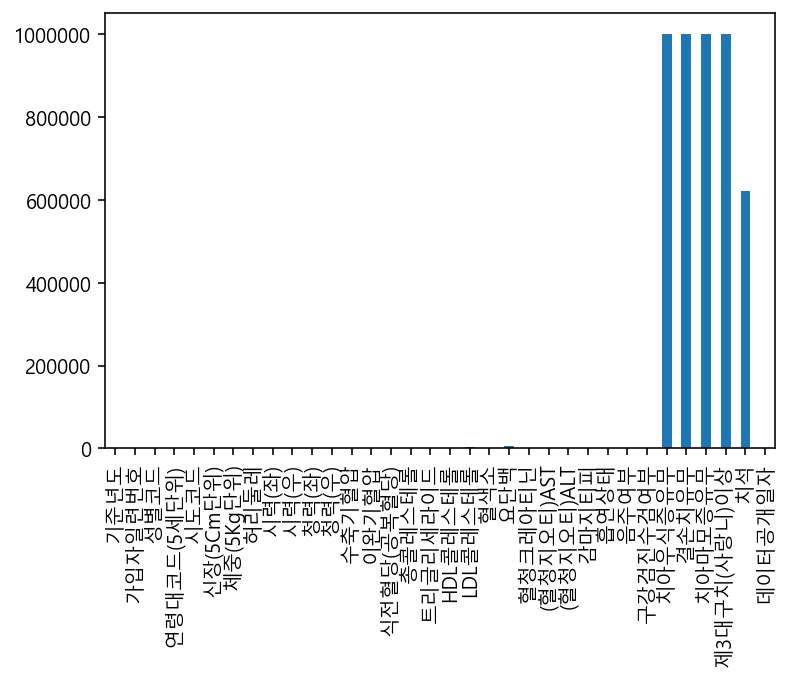

In [252]:
#결측치수를 시각화해보기
#치아데이터 부분에서 결측치가 많다는 것을 결과로 확인할 수 있었다
df.isnull().sum().plot.bar()

In [254]:
#여러 컬럼 가져와 보기
#"(혈청지오티)ALT", "(혈청지오티)AST" 를 가져와본다
df[["(혈청지오티)ALT", "(혈청지오티)AST"]] 
#대괄호 2번해주어야 데이터 프레임형태로 출력해준다

,(혈청지오티)ALT,(혈청지오티)AST
0,35.0,21.0
1,36.0,20.0
2,32.0,47.0
3,34.0,29.0
4,12.0,19.0
...,...,...
999995,36.0,26.0
999996,17.0,14.0
999997,27.0,30.0
999998,14.0,21.0


In [255]:
#가져온"(혈청지오티)ALT", "(혈청지오티)AST" 를 요약해본다
#count(수), mean(평균), std(표준편차), min(최소), max(최소), 25%(1,4분위), 50%(2,4분위=중앙값), 75%(3,4분위)
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999958.000000,999959.000000
mean,25.749509,25.994671
std,26.294770,23.587469
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,29.000000,28.000000
max,7210.000000,9999.000000


In [256]:
#value_counts -> 빈도수 집계 can
#남성(1), 여성(2) 데이터인 성별코드로 그룹화하고 갯수 집계해보기
df["성별코드"].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [257]:
### 4-3끝

In [ ]:
##4-4 시작 두개이상의 컬럼값을 분석해보고싶다하면 groupby와 pivot_table사용을 이해한다
#둘은 비슷하지만 약간의 차이가 있다 이를 이해해보자

In [259]:
#?를 통해서 공식문서를 볼 수 있다
#이를 보면서 이해도를 높이기 위해 예시(Examples)를 보는 것을 추천한다.
#어떤식으로 groupby를 사용하는지 알 수 있다
df.groupby?

In [262]:
#성별코드로 그룹화 한 데이터를 세본다
#가입자일련번호로 성별인 남성, 여성이 몇명이 되는지 세보았다
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [263]:
#성별코드와 음주여부로 그룹화하고 갯수를 세어본다
#1은 남성, 2는 여성-> 음주 안함(N)몇명, 음주 함(Y) 몇명을 알 수 있다
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     N       173612
      Y       356587
2     N       326827
      Y       142438
Name: 가입자일련번호, dtype: int64

In [264]:
#성별코드와 음주여부로 그룹화하고 감마지피티의 평균을 구해본다
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()
#->음주 여부에 따라사 감마지티피가 얼마나 차이나는지를 봤더니 음주하는 사람이 상대적으로 높게 나타나는 것을 볼 수 있었음
#감마지티피와 음주와의 관계를 알수있게되었다

성별코드  음주여부
1     N       34.739868
      Y       56.610981
2     N       22.612408
      Y       25.001018
Name: 감마지티피, dtype: float64

In [ ]:
#groupby와 같은 기능을 하는 pivot_table을 이용해볼 것이다
#pivot과 pivot_table의 차이점
#-> pivot은 연산은 하지않고 데이터 형태만 바꾸고자할때사용, pivot_table은 연산을 하고자할 때 사용


In [266]:
#음주여부에 따른 그룹화된 수를 피봇테이블로 구한다
#데이터프레임형태로 출력되는 것을 볼 수 있다(groupby와이 차이점)
#groupby보다 pivot_table이 좀더 직관적
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

,가입자일련번호
음주여부,
N,500439
Y,499025


In [268]:
#음주여부에 따른 감마지티피의 평균을 구한다 (불러올데이터, 앞의 인덱스, 값, 구할것)
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc='mean')

,감마지티피
음주여부,
N,26.819650
Y,47.588675


In [ ]:
#groupby는 약간 빠르고 pivot_table은 직관적이다
#서로의 기능을 다 할수 있다

#4-4 끝

In [ ]:
#4-5 시작. 히스토그램으로 전체 수치 데이터를 한번에 시각화 하기

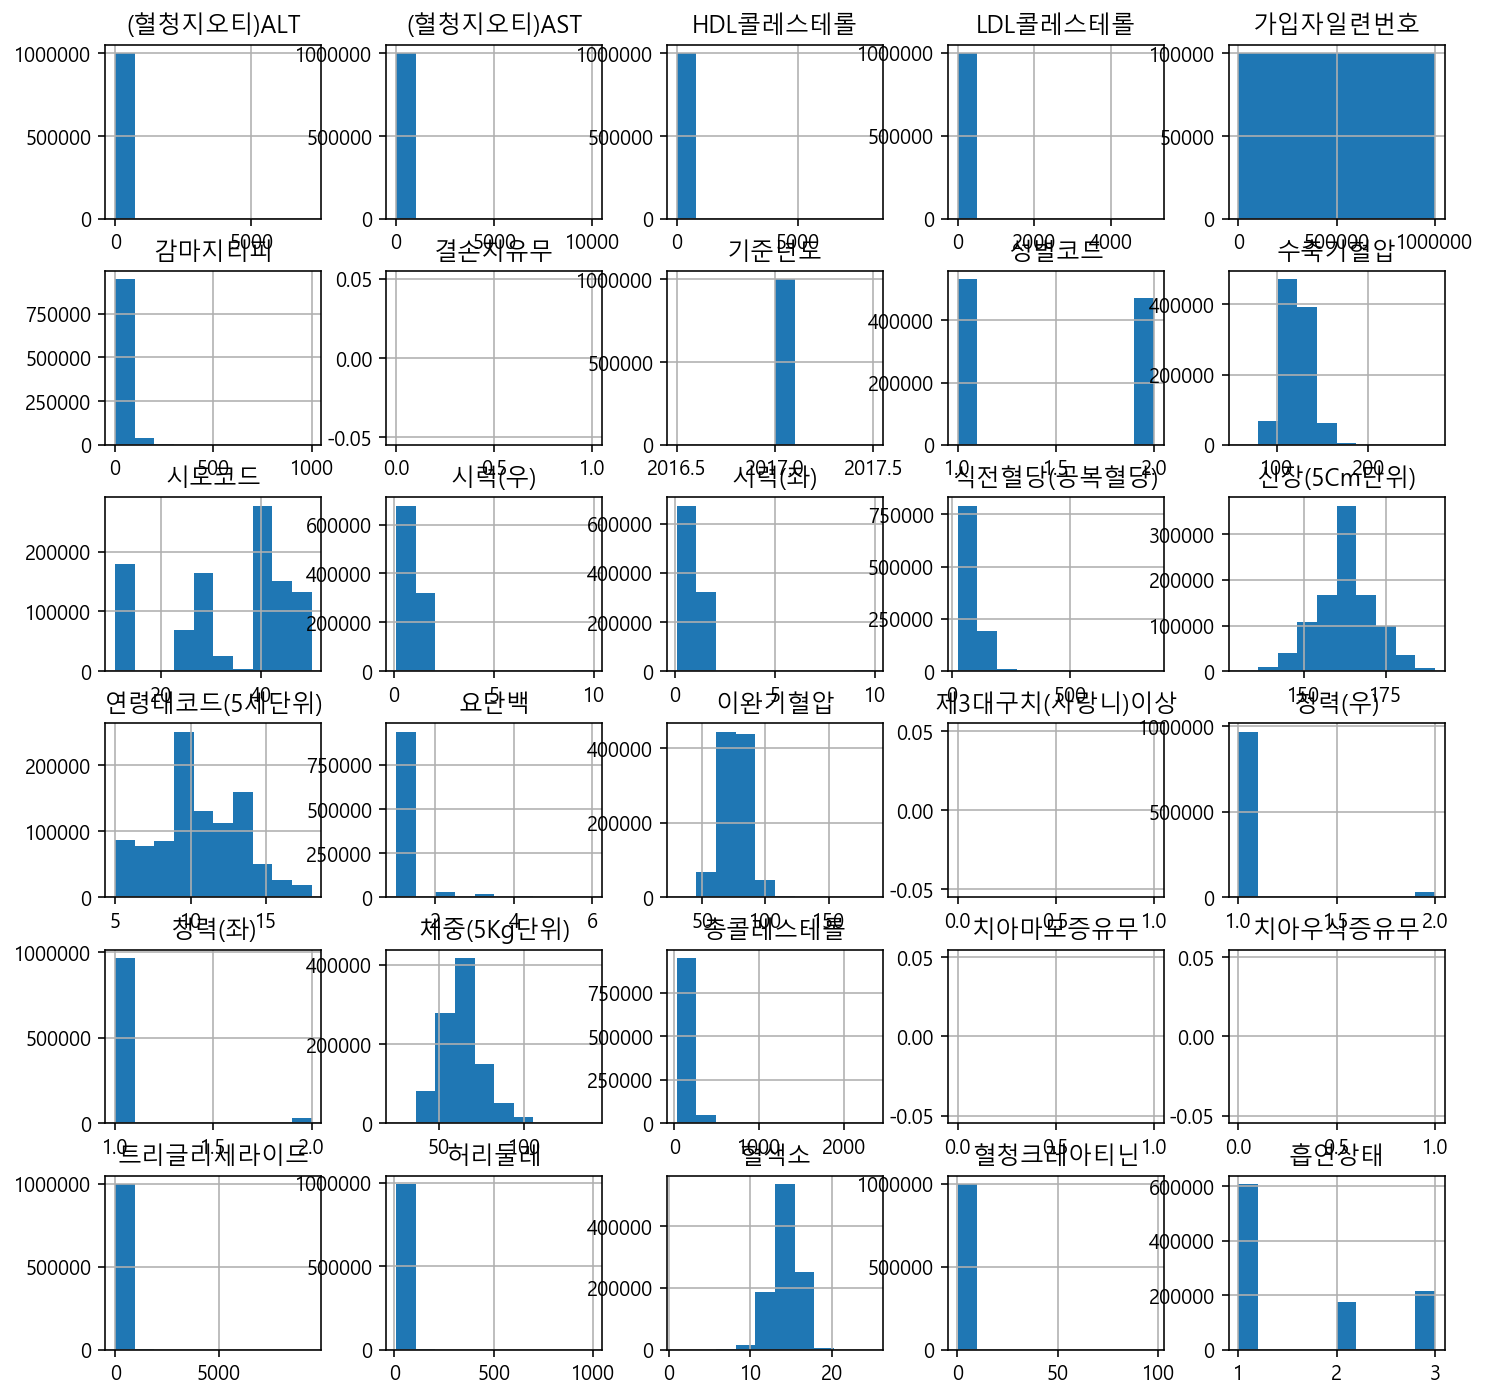

In [270]:
#100만개가 넘는 데이터를 시각화 할 때는 되도록이면  groupby 혹은 pivot_table로 연산을 하고 시각화하는 것을 권장
#전체 데이터에 대한 히스토그램
h = df.hist(figsize=(12,12))

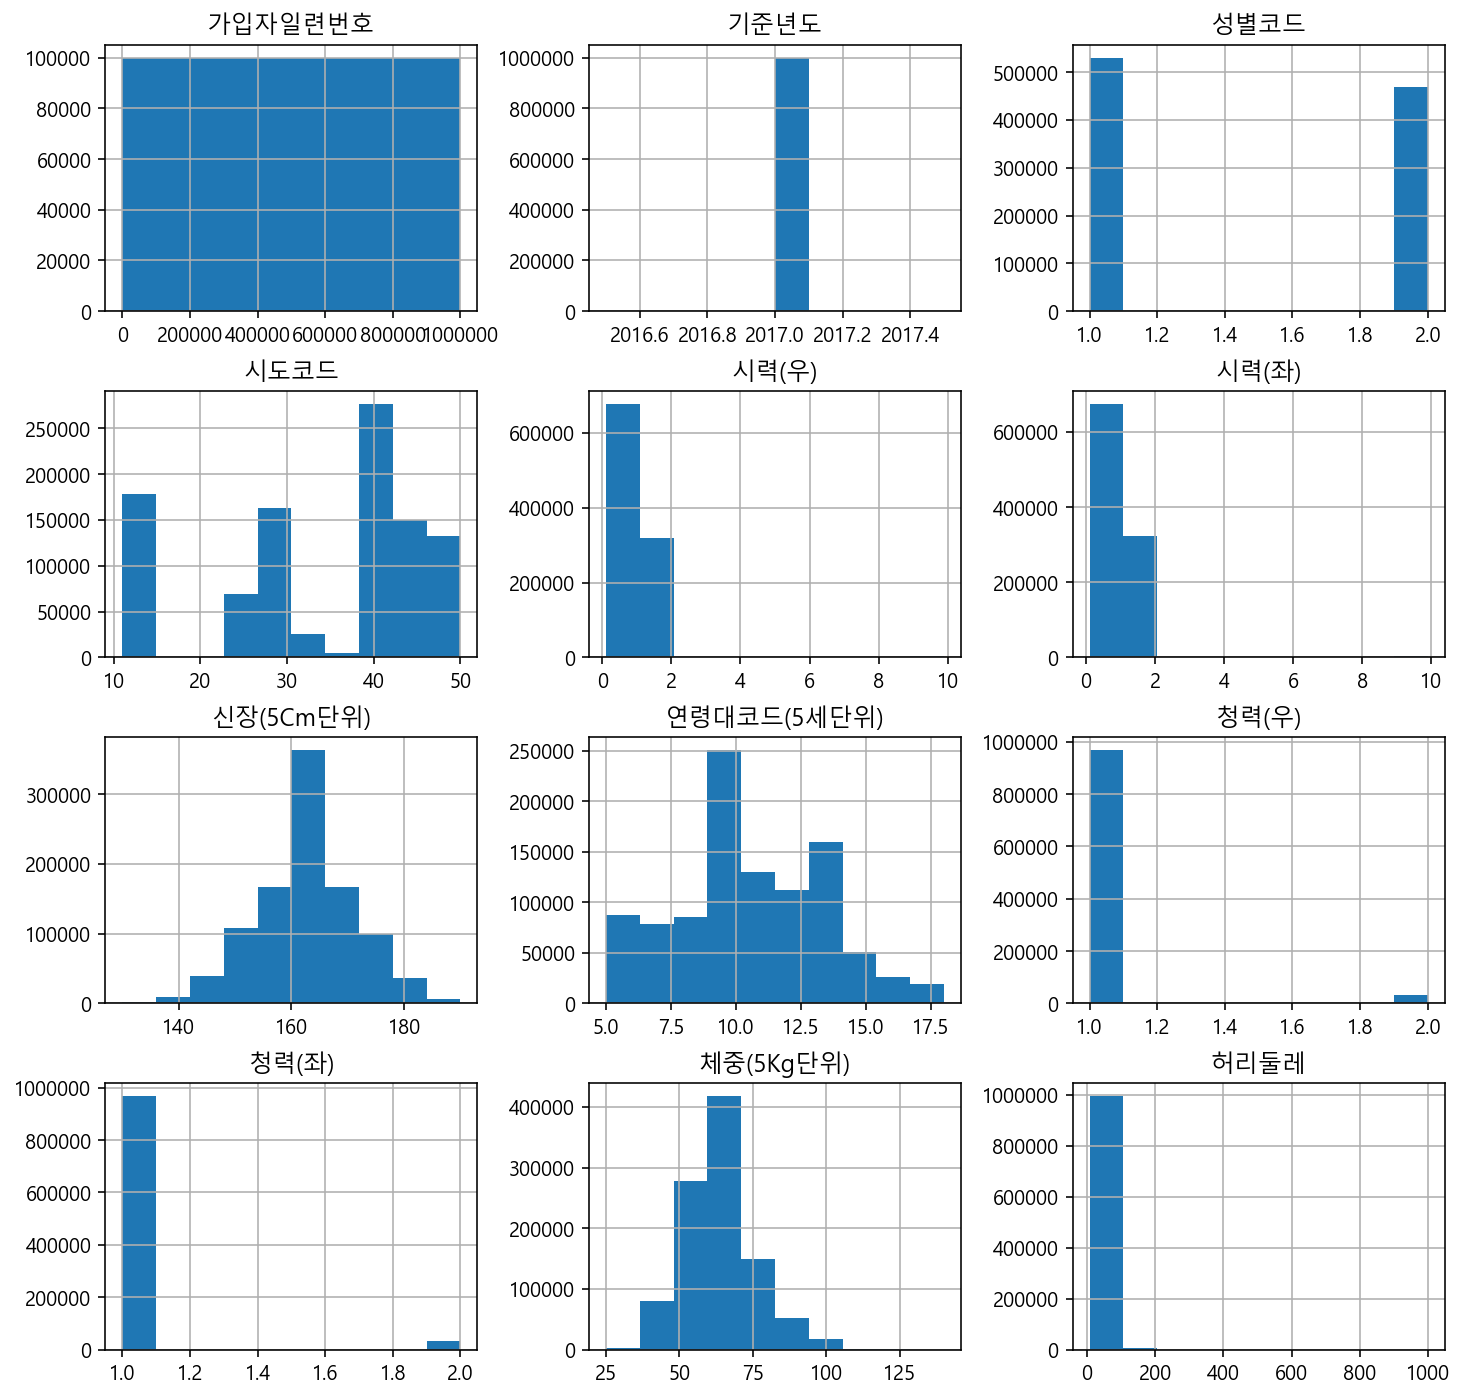

In [274]:
#슬라이싱 기능을 사용해서 데이터를 나누어 그린다 
#슬라이싱 사용시 iloc를 활용하면 인덱스의 순서대로 슬라이싱이 가능하다
#iloc[행, 열]순으로 인덱스를 써주면 해당 인덱스만 불러온다 
#앞에서 12개 컬럼에 대해서 히스토그램을 그려준다
h = df.iloc[:,:12].hist(figsize=(12,12)) 

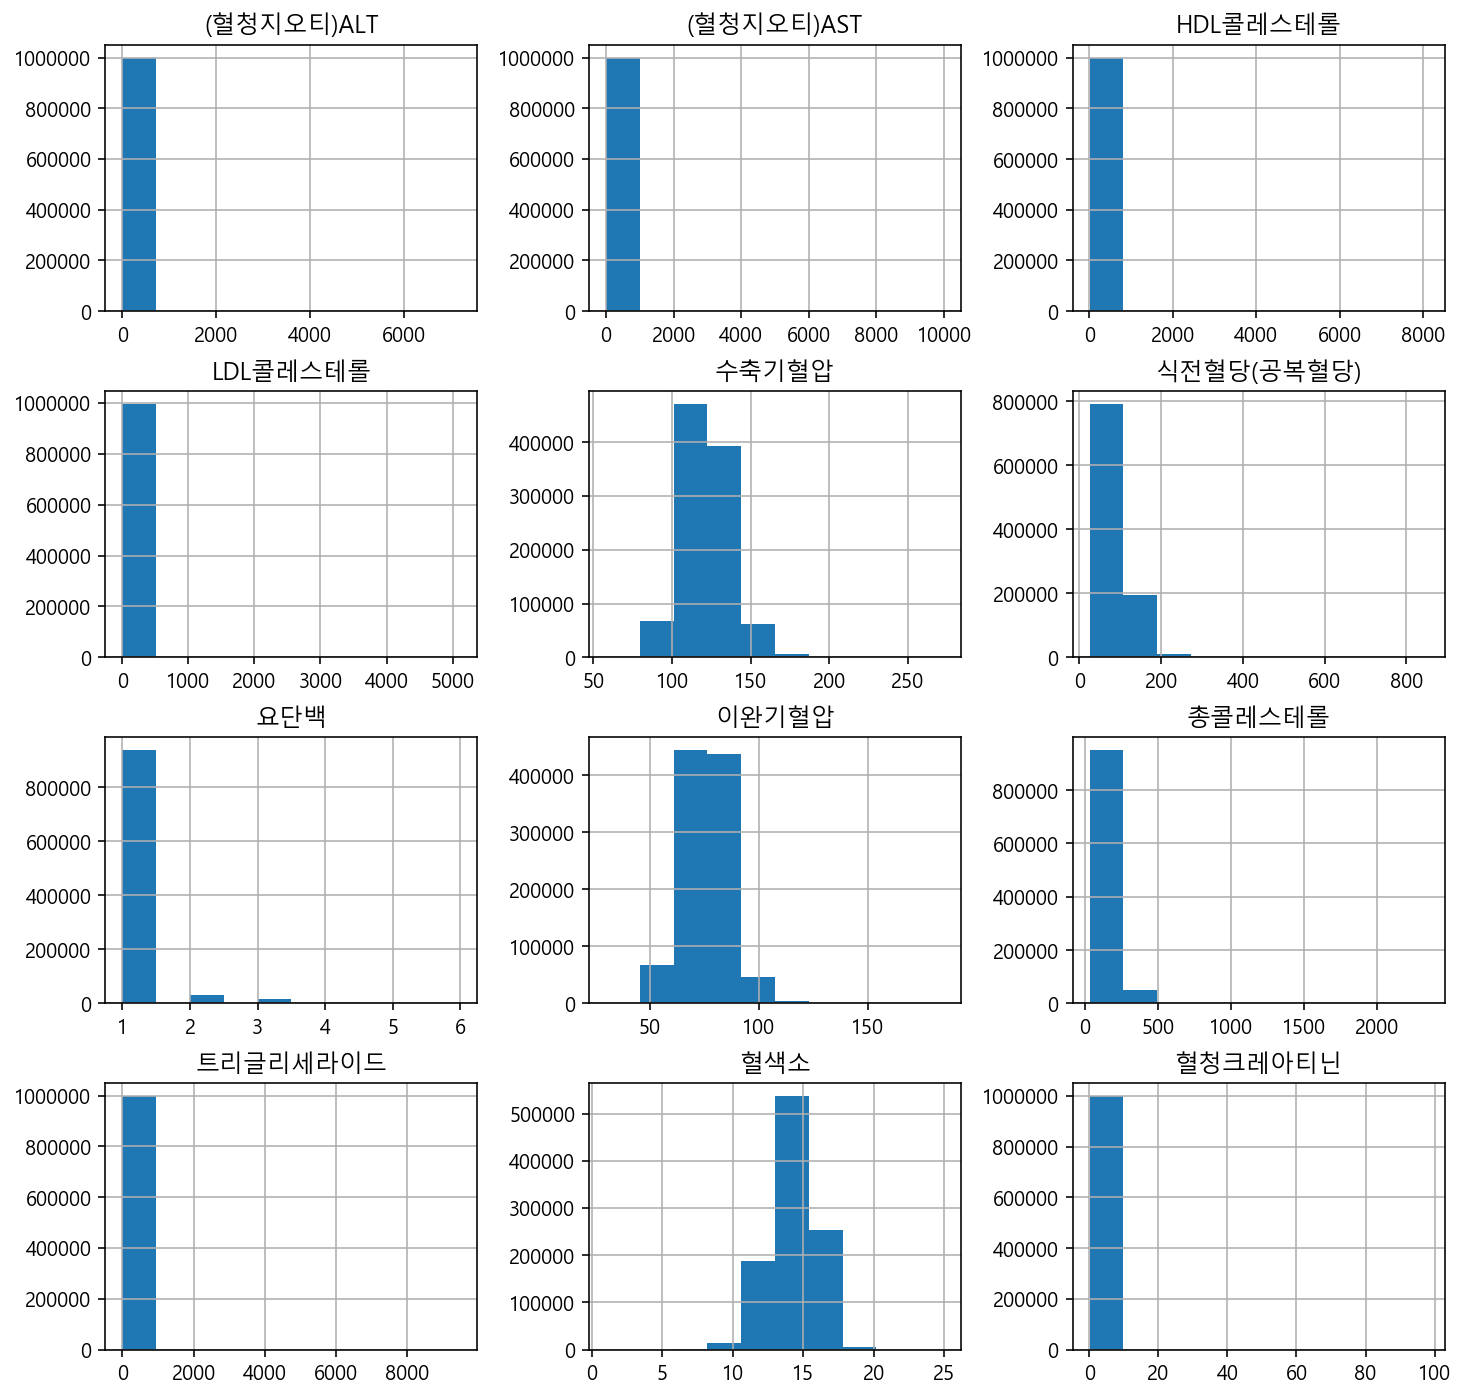

In [277]:
#슬라이싱을 사용해서 앞에서 12번째부터 23번째까지(12:24)컬럼에 대한 데이터로 히스토그램을 그린다
h = df.iloc[:, 12:24].hist(figsize=(12,12))

In [278]:
#4-5 끝

In [ ]:
#4-6 시작. seaborn으로 데이터시각화하기

In [279]:
#seaborn을 이용하기 전에 전체데이터를 가져오면 속도가 오래 걸릴 것 같아서
#샘플데이터 100개를 가져와서 실습해볼 것이다
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

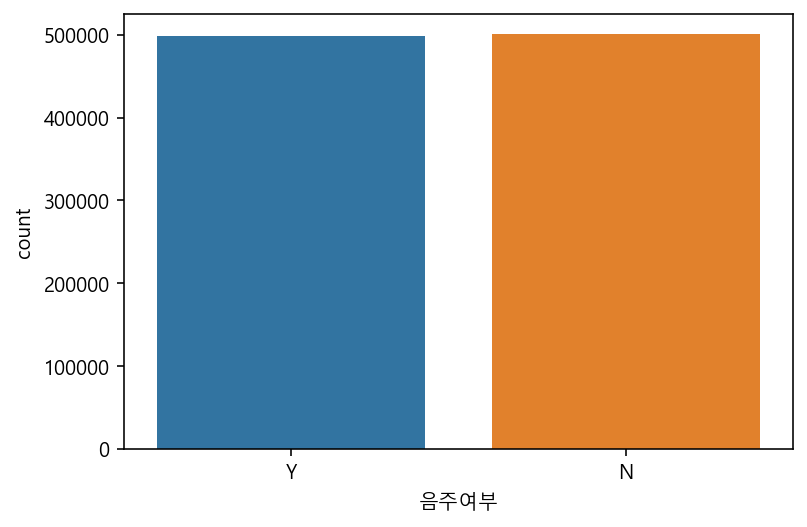

In [281]:
#범주형 데이터(문자형 데이터)와 수치형 데이터에 따라 시각화하는 방법이 조금 다르다
#음주여부에 따른 countplot을 그려보았다
sns.countplot(x="음주여부", data=df)

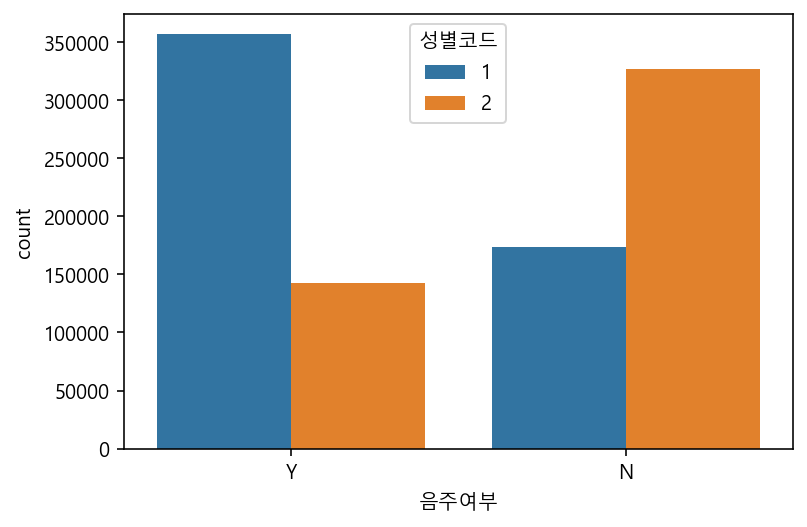

In [282]:
#성별에 따른 음주여부를 시각화해서 봐보았다
sns.countplot(data=df, x="음주여부", hue="성별코드")

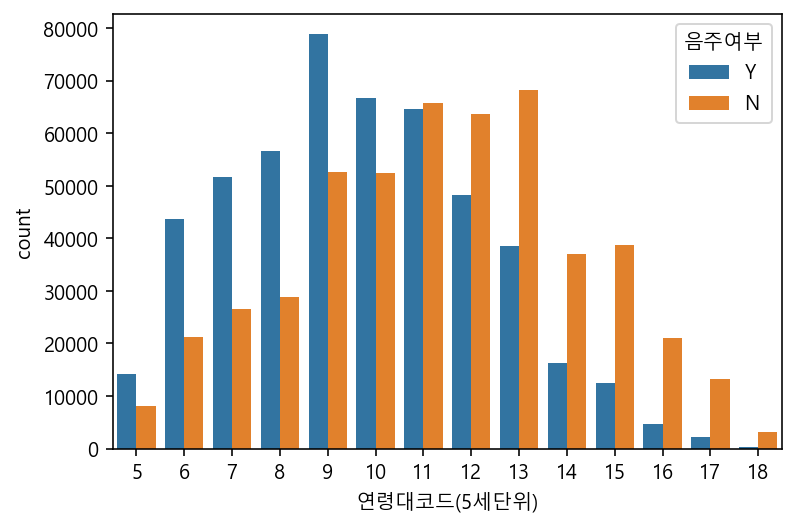

In [283]:
#연령대별 음주여부 시각화해보기
sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")

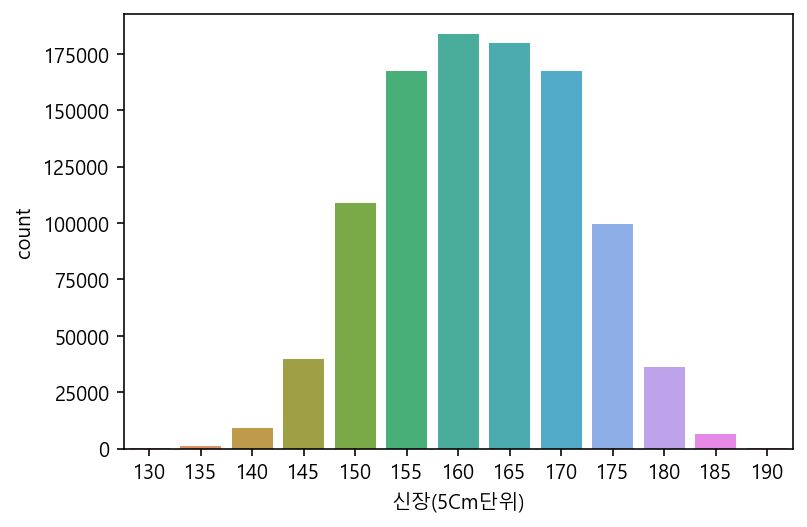

In [286]:
#키와 몸무게
sns.countplot(data=df, x="신장(5Cm단위)")

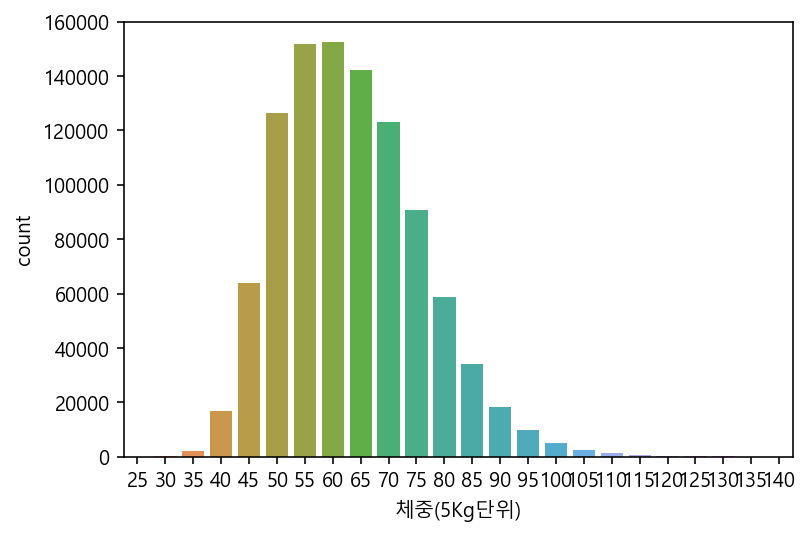

In [287]:
#체중 보기
sns.countplot(data=df, x="체중(5Kg단위)")

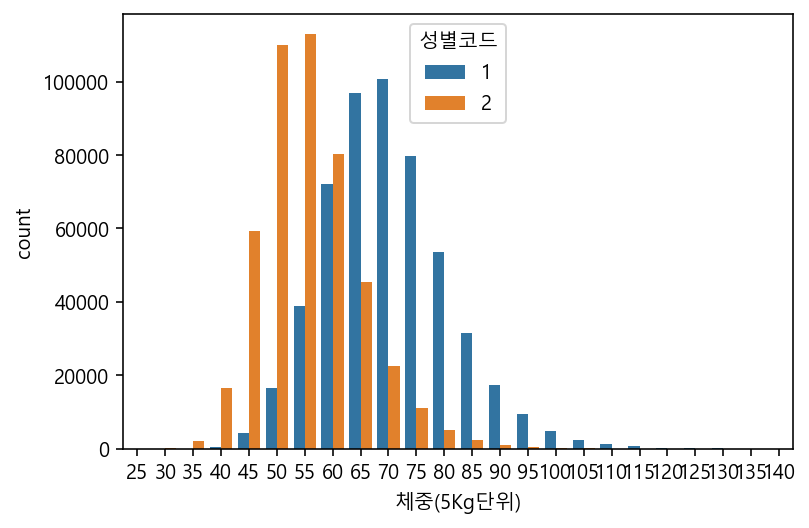

In [288]:
#성별에따른 체중 차이 보기 -> hue 사용
sns.countplot(data=df, x="체중(5Kg단위)", hue="성별코드")

In [ ]:
#4-6 끝

In [ ]:
#4-7 시작 barplot그리는 방법 배우기 (countplot과 약간의 차이가 있다)

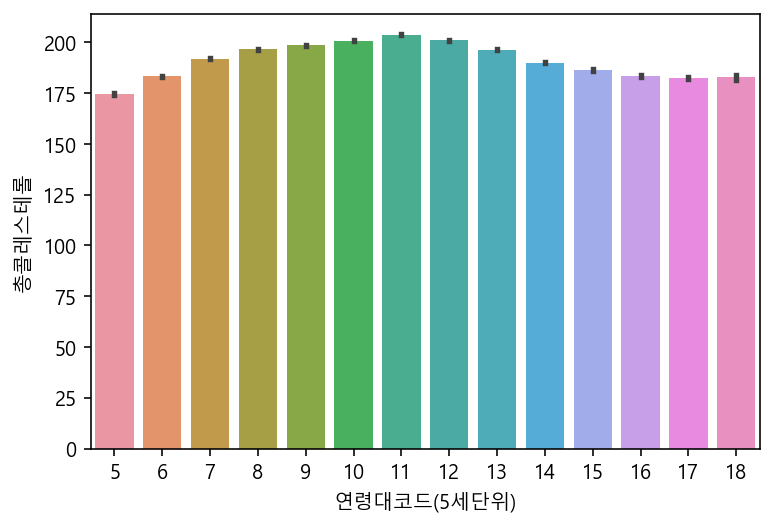

In [292]:
#수치형과 범주형데이터를 시각화할 때 barplot을 많이 사용한다
#연령대코드와 총콜레스테롤을 본다
#countplot과 비교했을때  barplot으로 그렸을 때 느리게 그려지는 것을 확인할 수 있다
#느리게 그려지는 이유는  y의 총콜레스테롤 각각의 평균들을 구하기때문이다
sns.barplot(data=df, x="연령대코드(5세단위)", y="총콜레스테롤")

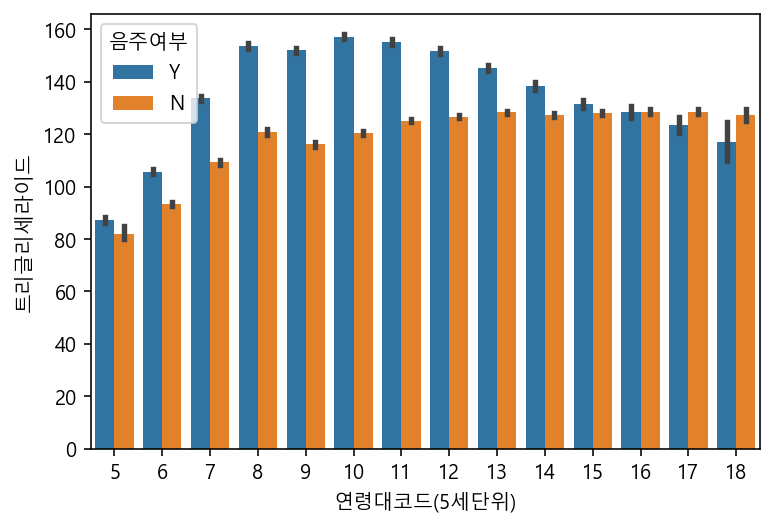

In [294]:
#트리글리세라이드(중성지방)에 따른 연령대코드(5세단위)를 음주여부에 따라 barplot으로 그린다
sns.barplot(data=df, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부")
#그래프 위로 나타나는 검은색 막대는 신뢰구간을 의미한다

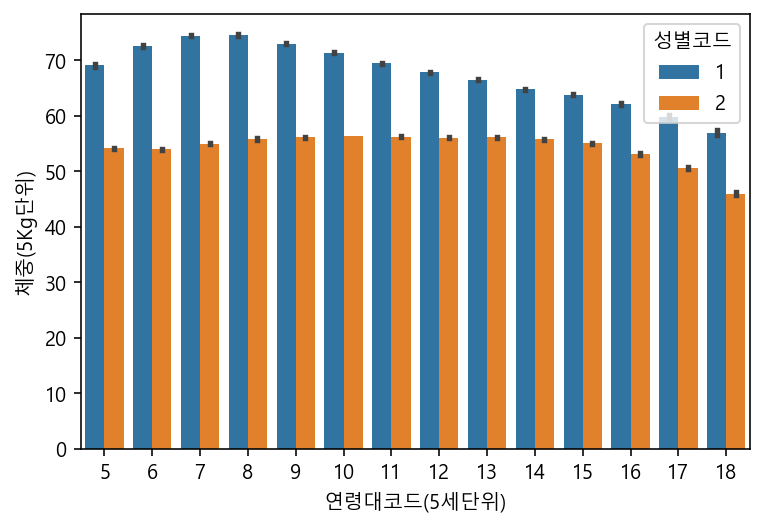

In [306]:
#연령대코드와 체중(5Kg 단위)을 성별에 따라 봅니다
sns.barplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드")
#연령대가 높아질수록 체중이 조금씩 줄고 있는 것을 볼 수 있다

In [303]:
#4-7 끝

In [ ]:
#4-8 시작 lineplot()과 pointplot()으로 선그래프 그리기

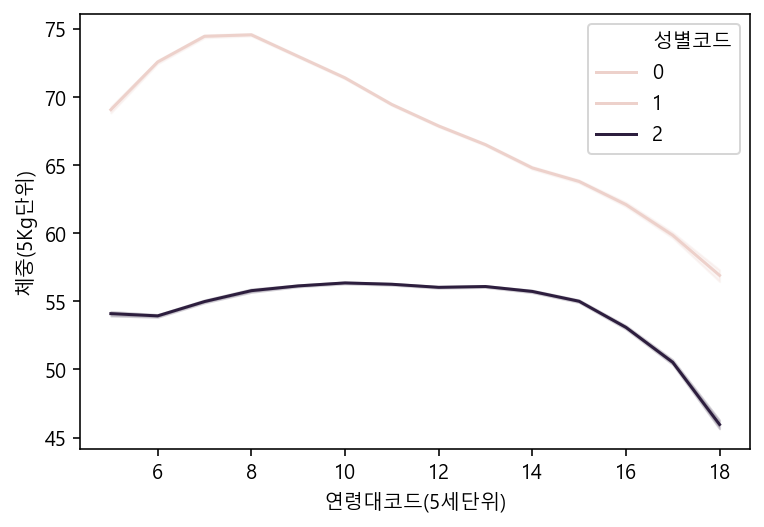

In [305]:
#위에서 그렸던 막대그래프를 lineplot을이용하여 선그래프로 그리기
#data를 전체데이터df로 하여서 시간이 조금 걸린다. 빠르게 출력해보고 싶으면 
#1000개의 샘플데이터인 df_sample을 써주면 빠르게 출력된다
sns.lineplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드")

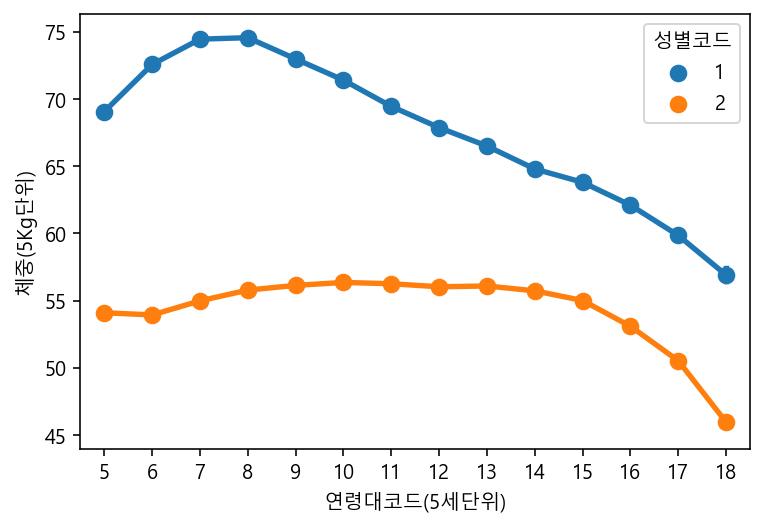

In [308]:
#pointplot을 그리면 위의 선그래프에 점을 표시해주는 것을 확인할 수 있다
sns.pointplot(data=df, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드")

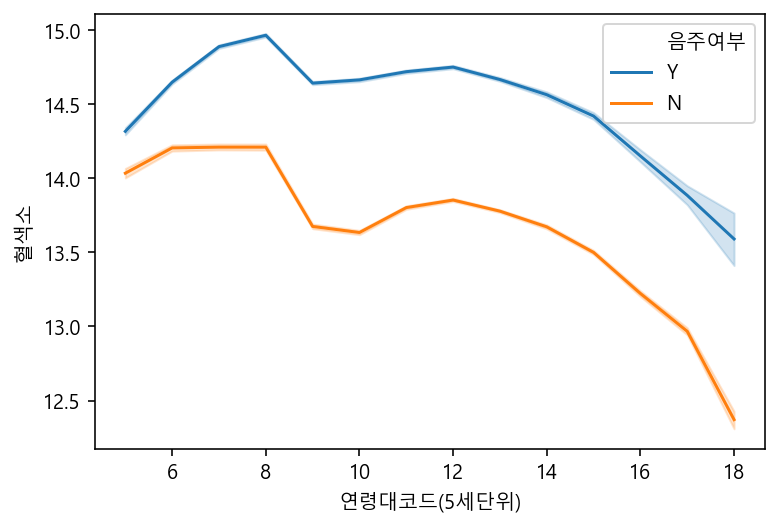

In [313]:
#연령대코드(5세단위)에 따른 혈색소를 음주여부에 따라 lineplot으로 그린다
#연령이 오를수록 혈색소가 줄어들고, 음주하고있는 사람들이 혈색소값이 더 높은 것을 확인할 수 있다
#그래프사이즈를 크게하려면 plt.figure(figsize=(15,4))를 작성한다
sns.lineplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

In [314]:
#4-8끝
# barplot은 막대그래프로 개별값을 표현하고, 
#lineplot이나 pointplot으로는 선을통해 값의 기울기로 많고 적음을 표시해볼 수 있다
#lineplot이나 pointplot은 주식의 가격이나 부동산 가격, 재고량, 판매량이 그려지는데 많이 사용된다

In [315]:
#4-8끝

In [ ]:
#4-9 시작 boxplot그리기

In [331]:
#상자 수염 그림 (위키백과)검색해서 사진보여주면서 설명
#박스의 윗선은  75%의 값, 박스안 중간선은 50%의 값, 박스 가장아랫선은 25%의 값
#점은 이상치를 의미, 가장 윗선은 최댓값, 가장아랫선은 최솟값을 의미
#이상치는 75%값 - 25%값을 계산하여 나온값에서, 이 값의 1.5배 이상 초과하는 값과 
#미달하는 값을 점으로 표현한 값이다

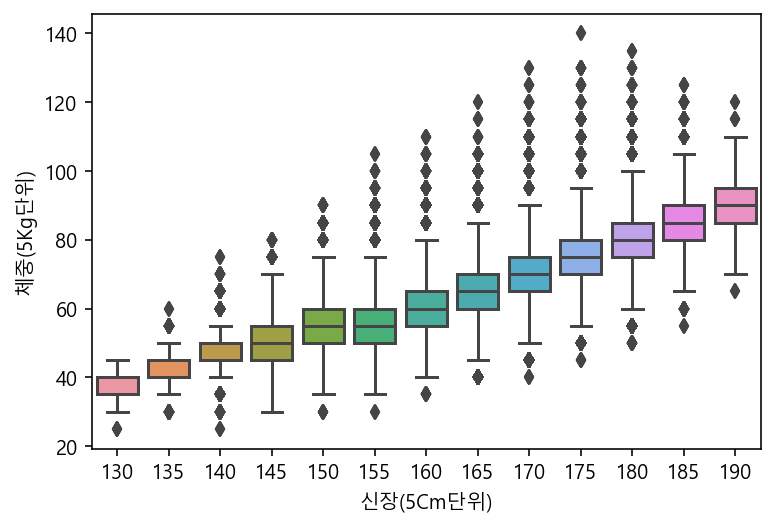

In [332]:
#boxplot으로 신장(5cm단위)에 따른 체중(5kg 단위)을 그린다
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)")

In [ ]:
#4-9 끝 

In [335]:
#4-10 수치형데이터를 시각화해보겠다 -> scatterplot(산점도)을 사용해볼 것이다

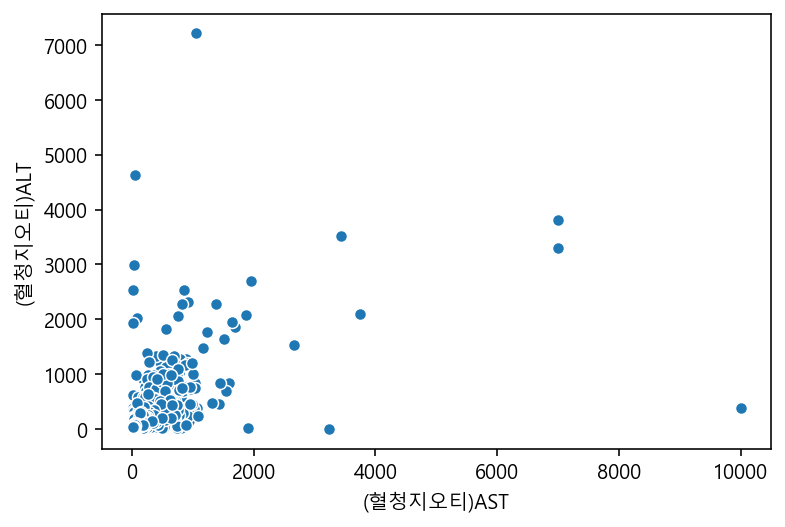

In [339]:
#scatterplot으로 (혈청지오티)AST, (혈청지오티)ALT를 그린다
#수치형 데이터의 상관관계를 볼 때 산점도 사용한다
sns.scatterplot(data=df, x="(혈청지오티)AST", y="(혈청지오티)ALT")
#점을 하나하나 다 표현하기때문에 시간이 좀더 오래 걸릴수 있다
#이는 그래프의 이상치를 파악하기에 좋다(상대적으로 떨어져있는 점 파악can)

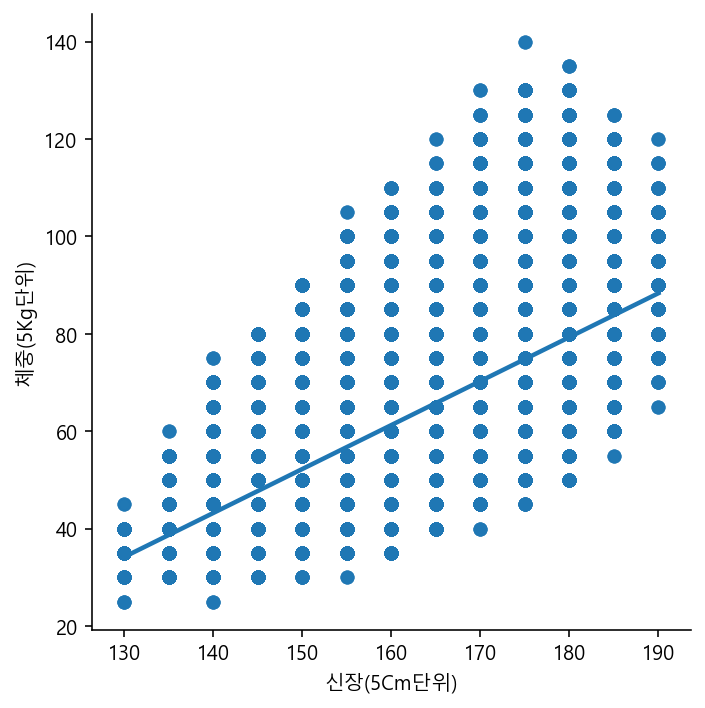

In [340]:
#lmplot으로 상관관계를 더 잘 파악해 볼 수 있다
#lmplot으로 신장(5cm단위)에 따른 체중(5kg단위)을 그려본다
sns.lmplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)")

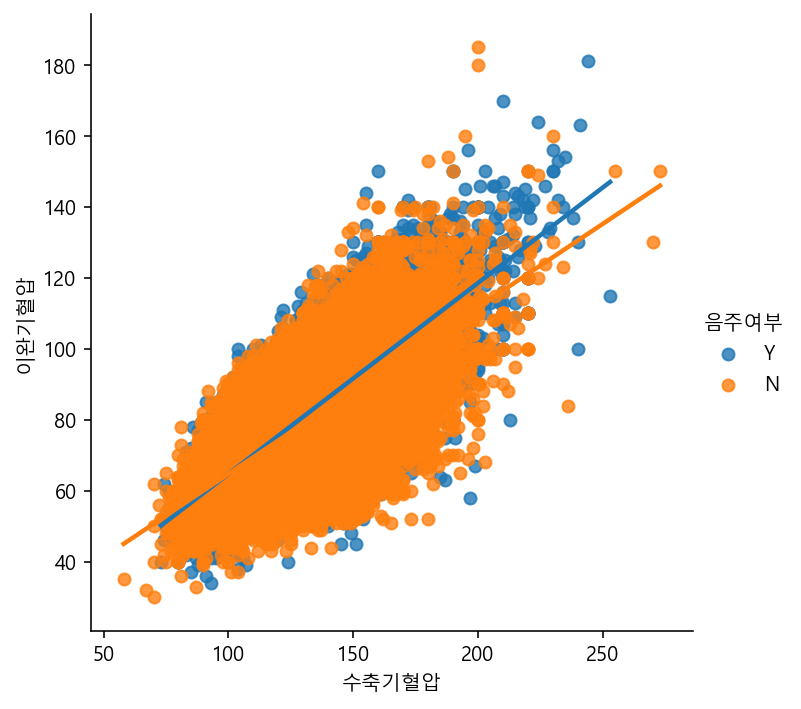

In [346]:
#lmplot으로 수축기, 이완기혈압을 그리고 음주여부에 따라 다른 색상으로 표현되게 한다
sns.lmplot(data=df_s, x="수축기혈압", y="이완기혈압", hue="음주여부")
# 결과는 x와 y와 강한상관관계가 있다는 것을 대각선으로 보여주어서 알 수 있다
#음주하고있는 사람들의 기울기가 더 가파른것을 볼 수 있다

In [347]:
#4-10끝

In [351]:
#4-11 아웃 #4-12 아웃 확률밀도함수, 상관계수 관련 개념인데 어렵게 다가갈것 같아서 아웃시켰다

In [354]:
#5-1 시작 국가통계포털(KOSIS)에서 제공하는 데이터셋을 사용해서 한국 뷰티가 얼마나 성장하고 있는지에 
#대한 데이터 분석을 해보려고 한다
#어떤 품목이 얼마나 판매가 되고 있는지 확인해 볼 수 있다
#(이를 보고 어떤 물건을 판매를 하면 좋을지, 어떤 국가에 판매 전략을 세우면 좋을지를 전략을 세울수 있을 것이다)

In [97]:
#2-1데이터 분석에 필요한 파이썬의 기초에 대해 학습

In [100]:
#파이썬의 철학에 대한 설명을 가져옴
#import는 파이썬의 라이브러리나 패키지를 가져올 수 있다
import this

In [101]:
#파이썬에서 True출력
True

True

In [102]:
#파이썬에서 True 는 1과 같다
#같다는 비교 연산자로 == 을 사용한다
True==1

True

In [103]:
#파이썬에서 숫자1과 문자 "1"은 다르다
True =="1"

False

In [104]:
#문자열 Hello world를 출력해본다
"Hello world"

'Hello world'

In [105]:
# run이라는 내가 맘대로 지정한 변수에 Happy Day라는 문자열을 담아본다
run = "Happy Day"

In [106]:
#모두 소문자로 만들어본다 
#.lower()사용
run.lower()

'happy day'

In [107]:
#모두 대문자로 만들어본다
#upper()사용
run.upper()

'HAPPY DAY'

In [114]:
#리스트에 대해서 배워본다
#list라는 변수에 비어있는 리스트를 만든다
list = []

In [115]:
#만든 리스트에 python, java, c라는 원소를 추가해본다
#append이용
list.append("python")
list.append("java")
list.append("c")

In [116]:
list

['python', 'java', 'c']

In [117]:
#안택싱을 이용해서 변수에 담겨있는 원하는 원소를 가져온다
#인덱스번호는 0부터 시작한다
#0인덱스에 있는 python이 출력되는것을 확인해볼 수 있었다
list[0]

'python'

In [122]:
#반복문 -> 특정횟수만큼 반복문을 실행하도록 한다
for i in range(5):
    print(i)

0
1
2
3
4


In [124]:
#반복문에 조건문을 넣어서 실습해보았다
#0부터 시작하므로 짝수번에서 hello출력, 홀수에서 java출력되는것을 확인할 수 있었다
for i in range(10):
    if i % 2 == 0:
        print("hello")
    else:
        print("java")

hello
java
hello
java
hello
java
hello
java
hello
java


In [125]:
#문자열길이 계산 len
address = "동해물과 백두산이 마르고 닳도록"
len(address)

17

In [126]:
##2-1끝

In [128]:
##2-2 파이썬 대표적인 라이브러리 pandas기초
#pandas는 panel data system의 약자로, panel data는 행과 열로 된 액셀과도 유사한 데이터를
#다루는 것이 pandas다
#대용량 데이터를 빠르게 처리할 수 있고, 기존의 소스코드를 재사용 할 수 있다는 장점이 있다
#pandas라이브러리 불러오기
import pandas as pd

In [129]:
#간단한 데이터 프레임을 만들었다
df = pd.DataFrame(
{"a":[4,5,6],
"b":[7,8,9],
"c":[10,11,12]},
index=[1,2,3])

In [130]:
#데이터 프레임 형태
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [131]:
#시리즈 데이터 형태(1차원의 자료구조를 가짐)
df["a"]

1    4
2    5
3    6
Name: a, dtype: int64

In [132]:
#대괄호 두번쓰면 데이터 프레임 형태로 출력됌 (2차원의 자료구조를 가짐)
df[["a"]]

,a
1,4
2,5
3,6


In [133]:
# 두개이상의 컬럼을 가져올때는 항상 데이터 프레임 형태로 가져올 수 있다
#그래서 괄호를 두번 써주어야합니다
df[["a", "b"]]

,a,b
1,4,7
2,5,8
3,6,9


In [134]:
#특정 컬럼 제거 drop
#c컬럼을 axis=1로 컬럼을 기준으로 드랍해준다
df = df.drop(["c"], axis=1)
df
#변수에 담아주어야 삭제한 것을 확인할 수 있다

,a,b
1,4,7
2,5,8
3,6,9


In [136]:
#groupby -> 데이터 집계
#a라는 컬럼으로 그룹바이해서 b라는 컬럼값으로 평균값 구해보았다
df.groupby(["a"])["b"].mean()

a
4    7
5    8
6    9
Name: b, dtype: int64

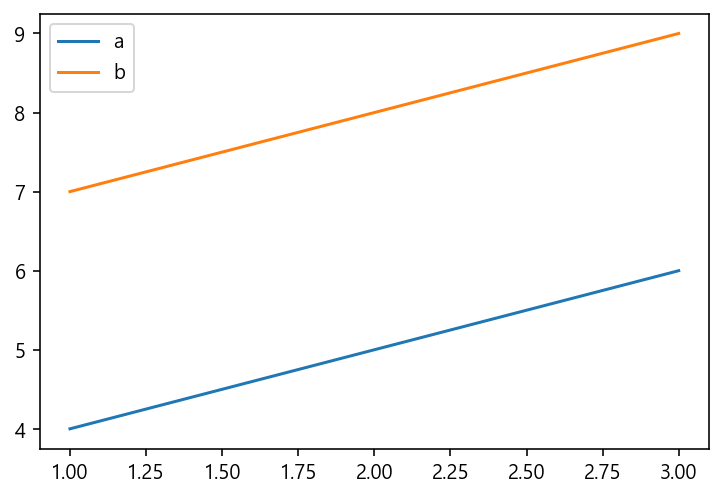

In [137]:
#그래프로 시각화
df.plot()

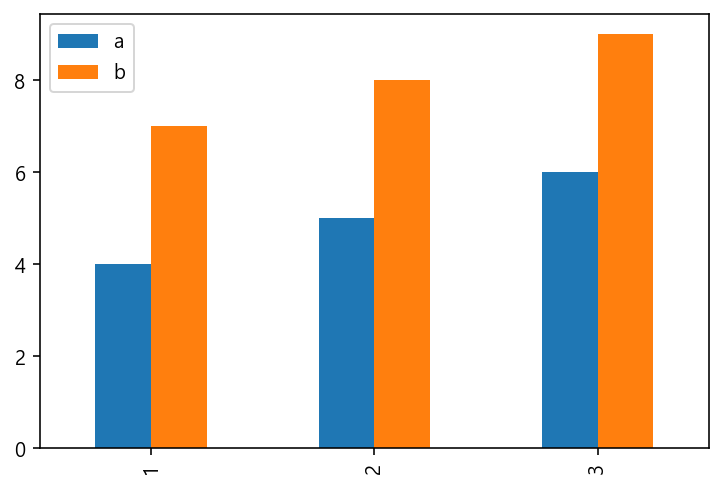

In [138]:
#막대그래프
#df.plot.하고 탭키를 누르면 다양한 시각화로 나타낼 수 있다
df.plot.bar()

In [139]:
##2-2 끝

In [140]:
#2-3시작

NameError: name 'encoding' is not defined